In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [2]:

df = pd.read_csv("/Users/mille/Desktop/Unit 5 Thinkful/ESSdata_Thinkful.csv")

df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

tolist 
returns a nested arrary 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html

In [3]:
countries = df.cntry.unique().tolist()


Setting up a for loop countries over ppltrst (Most people can be trusted or you can't be too careful). 
axs[0] to setup the histogram for 2012 per country 
axs[1] to setup the histogram for 2014 per country 

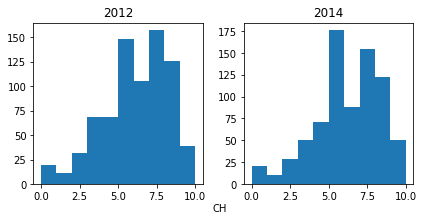

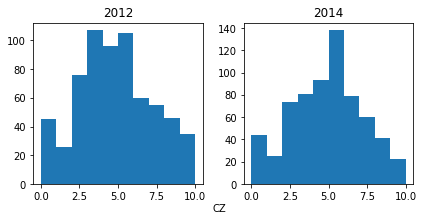

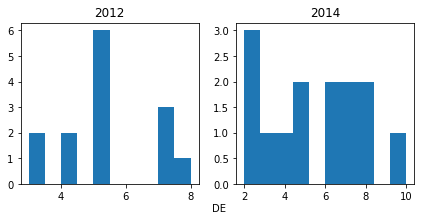

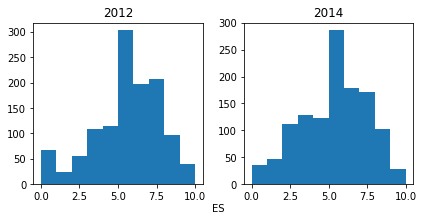

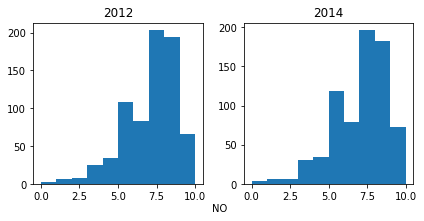

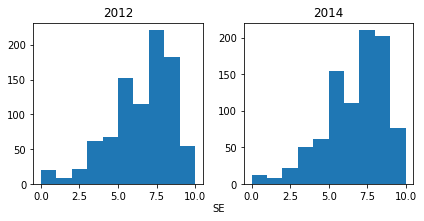

In [34]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))
    
    axs[0].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    

    plt.tight_layout()
    plt.show()

In [5]:
for country in countries:
    print('\n', country)
    print('2012 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.ttest_rel(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                          nan_policy='omit'
                         ))


 CH
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, pvalue=0.5102943511301135)

 CZ
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, pvalue=0.617129268240474)

 DE
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, pvalue=0.8568563797095805)

 ES
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, pvalue=0.014181580725320272)

 NO
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, pvalue=0.61209257015177)

 SE
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, pvalue=0.03900781670958545)


**It is important to note that the y-axis scale is not the same on all histograms**. 
ppltrst (Most people can be trusted or you can't be too careful)

CH: Switzerland
2012 and 2014 follow a similar shape and pattern of the histogram. Indicating that the between 2012 and 2014 ppltrst remained the same. 
2012 mean: 5.68
2014 mean: 5.75
Ttest_relResult(statistic=-0.6586851756725737, **pvalue=0.5102943511301135**) 
The p-value indicates no significant differences in the means. 

CZ: Czech Republic
2012 and 2014 - despite the 2012 appearing to look like greater values. The 2014 increased by 40 the overall pattern of the histogram remained the same. 
2012 mean: 4.36
2014 mean: 4.42
Ttest_relResult(statistic=-0.5001638336887216, **pvalue=0.617129268240474**)
The p-value indicates no significant difference in the means. 

DE: Germany
2012 and 2014 - These plots are the lowest of all the plots shown. Representing more of a binomial distribution then a normal distribution. 
2012 mean: 5.21
2014 mean: 5.36
Ttest_relResult(statistic=-0.18399501804849683, **pvalue=0.8568563797095805**)
The p-value indicates no significant difference in the means. 

ES: Spain 
2012 and 2014 - The histograms are strikely similary. 
2012 mean: 5.11
2014 mean: 4.90
Ttest_relResult(statistic=2.4561906976601646, **pvalue=0.014181580725320272**)
The p-value showed a significant difference in the means. Suggesting that there was a meaningful difference in how people in Spain viewed ppltrst (Most people can be trusted or you can't be too careful) between 2012 and 2014. 

NO: Norway
2012 and 2014 - The histograms are strikely similary.
2012 mean: 6.65
2014 mean: 6.60
Ttest_relResult(statistic=0.5073077081124404, **pvalue=0.61209257015177**)
The p-value indicates no significant difference in the means.

SE: Sweden
2012 and 2014 - Both years are very similar. There is a slight but noticeable increase on the right side of 2014 histogram. 
2012 mean: 6.06
2014 mean: 6.26
Ttest_relResult(statistic=-2.0671082026033982, **pvalue=0.03900781670958545**)
The p-value showed a significant difference in the means. Suggesting that there was a meaningful difference in how peple in Sweden viewed ppltrst (Most people can be trusted or you can't be too careful) between 2012 and 2014. 


Of the countries plotted above and p-values calulated, both Spain and Sweden which showed to have significant p-values also had the largest sample sizes. It appears that the countries are not weighted the same, nor was oversampling/undersampling addressed in this analysis. 

In [45]:
print('DE non-parametric')
print('2012 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==6)].median()))
print('2014 median: {0:.2f}'.format(df['ppltrst'][(df['cntry'] == 'DE') & (df['year']==7)].median()))  
print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                     df['ppltrst'][(df['cntry'] == country) & (df['year']==7)],
                     zero_method='wilcox', correction=False))


DE non-parametric
2012 median: 5.00
2014 median: 5.50
WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)


Within a hypothesis of 95% confidence interval this pvalue above we would reject the null hypothesis and accept the alternative. However, if we were testing to a 98 or 99% confidence interval or to 0.02 or 0.01 in our pvalue above we could not reject the null hypothesis. 

Also the DE (Germany) had very low sample values shown in histogram. I used DE since it had binomial distribution and I was intersted. 

This shows that the null hypothesis that the median is negative can be rejected at a confidence level of 5% in favor of the alternative that the median is greater than zero. The p-value based on the approximation is within the range of 0.019 and 0.054 given. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#r996422d5c98f-2

p-values: The p-value is a popular but controversial statistic for describing the significance of a hypothesis given the observed data. Technically, it is the probability of observing a result as “rejectable” (according to H0) as the observed statistic that actually occurred but from a new sample. So a p-value of 0.02 means that if H0 is true, we would expect to see results more reflective of that hypothesis 98% of the time in repeated experiments. Note that if the p-value is less than the set α level of significance for the test, the null hypothesis should be rejected (and otherwise should not be rejected).http://zoe.bme.gatech.edu/~bv20/isye6404/Bank/npmarginal.pdf



## Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

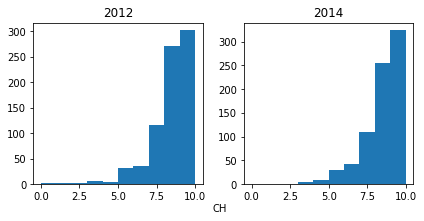

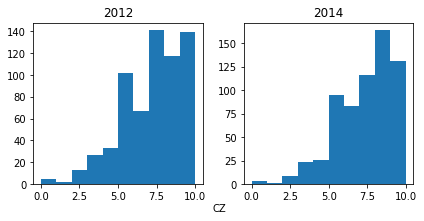

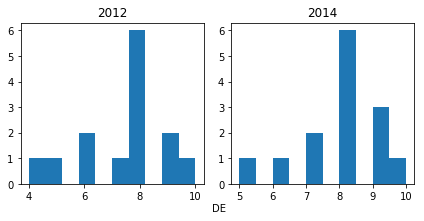

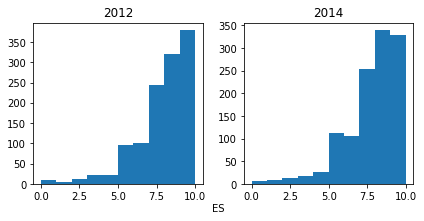

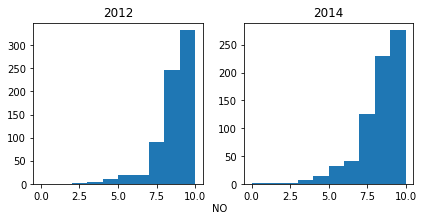

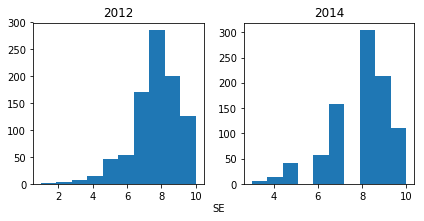

In [7]:
for country in countries:
    
    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df['happy'][(df['cntry'] == country) & (df['year']==6)].dropna())
    axs[1].hist(df['happy'][(df['cntry'] == country) & (df['year']==7)].dropna())

    fig.text(0.5, 0, country)
    axs[0].set_title('2012')
    axs[1].set_title('2014')
    
    plt.tight_layout()
    plt.show()

In [10]:
countrylist = df.cntry.unique()
trust_year = {}

df_12 = df.loc[df.year==6,:]
df_14 = df.loc[df.year==7,:]

for country in countrylist:
    trust_year[country] = stats.ttest_ind(df_12.loc[df_12.cntry==country, 'ppltrst'],
                                                  df_14.loc[df_14.cntry==country, 'ppltrst'],
                                                  axis=None, equal_var=True, nan_policy='omit')

In [11]:
print(trust_year)


{'CH': Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234), 'CZ': Ttest_indResult(statistic=-0.47654431369598554, pvalue=0.6337663626855166), 'DE': Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287), 'ES': Ttest_indResult(statistic=2.4942765167160026, pvalue=0.012687599930346013), 'NO': Ttest_indResult(statistic=0.5437669865283744, pvalue=0.586684963598745), 'SE': Ttest_indResult(statistic=-2.089164843127998, pvalue=0.036832086995183345)}


**Did people become more trust worthy?**

CH: Switzerland
2012 and 2014 - Histogram for both years showed a very similar pattern, only slight increase in 2014. 
Ttest_indResult(statistic=-0.6782716584661505, **pvalue=0.49770110247151234**)
The p-value is not signficant suggesting no meaningful difference in the means. 

CZ: Czech Republic
2012 and 2014 - Histogram for both years showed a very similar pattern, only slight increase in 2014.
Ttest_indResult(statistic=-0.47654431369598554, **pvalue=0.6337663626855166**)
The p-value is not signficant suggesting no meaningful difference in the means. 

DE: Germany
2012 and 2014 - Histogram for both years showed a very similar pattern, only slight increase in 2014. However, the value counts are very low. 
Ttest_indResult(statistic=-0.18084358577434545, **pvalue=0.8578926631223287**)
The p-value is not signficant suggesting no meaningful difference in the means. 

ES: Spain 
2012 and 2014 -  Histogram for both years showed a very similar pattern, only slight increase in 2014.
Ttest_indResult(statistic=2.4942765167160026, **pvalue=0.012687599930346013**)
The p-value is signficant suggesting there is a meaningful difference in the means. It should be noted that the sample for ES is much greater then that of the other countries. 

NO: Norway
2012 and 2014 - Histogram for both years showed a very similar pattern, only slight increase in 2014.
Ttest_indResult(statistic=0.5437669865283744, **pvalue=0.586684963598745**)
The p-value is not signficant suggesting no meaningful difference in the means. 

SE: Sweden
2012 and 2014 - Seems the most different of all the histogram plots. It is missing bins that were present in 2012 and absence in 2014. 
Ttest_indResult(statistic=-2.089164843127998, **pvalue=0.036832086995183345**)
The p-value is signficant suggesting there is a meaningful difference in the means. It should be noted that the sample for SE is much greater then that of the other countries. 

In [12]:
happier = {}
for country in countrylist:
    happier[country] = stats.ttest_ind(df_12.loc[df_12.cntry==country, 'happy'],
                                                  df_14.loc[df_14.cntry==country, 'happy'],
                                                  axis=None, equal_var=True, nan_policy='omit')

In [13]:
print(happier)


{'CH': Ttest_indResult(statistic=-0.3883916732706544, pvalue=0.6977798552552132), 'CZ': Ttest_indResult(statistic=-1.3033790688858846, pvalue=0.19267687243588685), 'DE': Ttest_indResult(statistic=-0.7648529270389165, pvalue=0.451246041120838), 'ES': Ttest_indResult(statistic=1.6739845099484867, pvalue=0.09426276206942426), 'NO': Ttest_indResult(statistic=4.26539164981969, pvalue=2.1241259786819524e-05), 'SE': Ttest_indResult(statistic=-0.5748685401292095, pvalue=0.5654516534859646)}


**Did people become happier?**

CH: Switzerland 
Ttest_indResult(statistic=-0.3883916732706544, **pvalue=0.6977798552552132**)
The p-value is not signficant. 

CZ: Czech Republic
Ttest_indResult(statistic=-1.3033790688858846, **pvalue=0.19267687243588685**)
The p-value is not significant. 

DE: Germany 
Ttest_indResult(statistic=-0.7648529270389165, **pvalue=0.451246041120838**)
The p-value is not significant. 

ES: Spain 
Ttest_indResult(statistic=1.6739845099484867, **pvalue=0.09426276206942426**)
The p-value is not significant. Only is we are using a 0.1 or 90% confidence interval. That is generally pretty weak. 

NO: Norway
Ttest_indResult(statistic=4.26539164981969, **pvalue=2.1241259786819524e-05**)
The p-value is significant which is less then 99% confidence interval or 0.001. 

SE: Ttest_indResult(statistic=-0.5748685401292095, **pvalue=0.5654516534859646**)
The p-value is not significant.

In [14]:
for country in countrylist:
    temp = df.loc[df.cntry==country, :]
    temp['rank'] = stats.rankdata(temp.loc[:, 'happy'])
    print('Result for {} is {}'.format(country, stats.kruskal(temp.loc[temp.year==6, 'rank'],
                                                       temp.loc[temp.year==7, 'rank'])))

C:\Users\mille\Conda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Result for CH is KruskalResult(statistic=0.11199672775584622, pvalue=0.7378822411273755)
Result for CZ is KruskalResult(statistic=0.7741339435361708, pvalue=0.3789412142073376)
Result for DE is KruskalResult(statistic=0.39056749122656015, pvalue=0.532001255058662)
Result for ES is KruskalResult(statistic=4.0786022231195425, pvalue=0.043429571364942514)
Result for NO is KruskalResult(statistic=20.63472268007812, pvalue=5.557890653893063e-06)
Result for SE is KruskalResult(statistic=0.09458914374973465, pvalue=0.7584221220941747)


Using the non-parameteric approach only Spain ES showed a pvalue lower then 0.05. 

The Kruskal-Wallis H-test tests the null hypothesis that the population median of all of the groups are equal. It is a non-parametric version of ANOVA. The test works on 2 or more independent samples, which may have different sizes. Note that rejecting the null hypothesis does not indicate which of the groups differs. Post-hoc comparisons between groups are required to determine which groups are different. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

## Question 3: Who reported watching more TV in 2012, men or women?

In [15]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


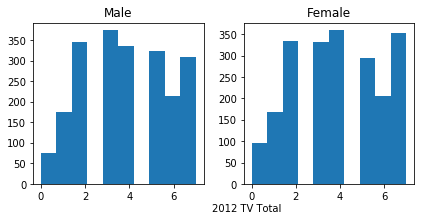

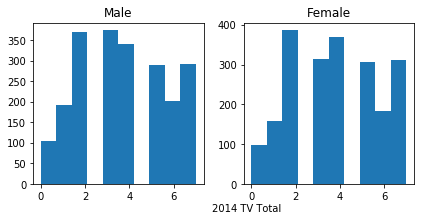

In [46]:
male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(male.dropna())
axs[1].hist(female.dropna())

fig.text(0.5, 0, '2012 TV Total')
axs[0].set_title('Male')
axs[1].set_title('Female')
    
plt.tight_layout()
plt.show()


male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 7)]
female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 7)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(male.dropna())
axs[1].hist(female.dropna())

fig.text(0.5, 0, '2014 TV Total')
axs[0].set_title('Male')
axs[1].set_title('Female')
    
plt.tight_layout()
plt.show()

In [17]:
print('Male mean: {0:.2f}'.format(male.mean()))
print('Female mean: {0:.2f}'.format(female.mean()))  
print(stats.ttest_ind(male, 
                    female,
                    nan_policy='omit'
                    ))

Male mean: 3.90
Female mean: 3.94
Ttest_indResult(statistic=-0.6899928109209502, pvalue=0.49023604027095813)


** tvtot - TV watching, total time on average weekday**

Histogram from 2012 to 2014 with gender and tvtot. The histograms are very similar for both male and female for both years

The p-value shows no significant suggesting or meaningful difference in the means. 

## Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [18]:
df.head(3)

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0


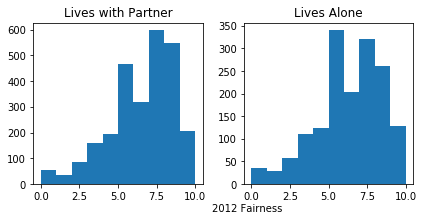

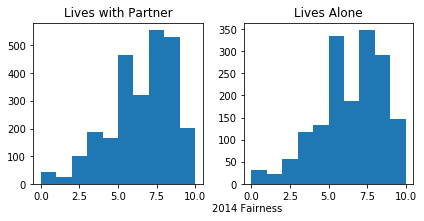

In [47]:
partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
alone = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())

fig.text(0.5, 0, '2012 Fairness')
axs[0].set_title('Lives with Partner')
axs[1].set_title('Lives Alone')
    
plt.tight_layout()
plt.show()


partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 7)]
alone = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 7)]

fig, axs = plt.subplots(1, 2, figsize=(6, 3))

axs[0].hist(partner.dropna())
axs[1].hist(alone.dropna())

fig.text(0.5, 0, '2014 Fairness')
axs[0].set_title('Lives with Partner')
axs[1].set_title('Lives Alone')
    
plt.tight_layout()
plt.show()

In [20]:
print('Lives with partner mean: {0:.2f}'.format(partner.mean()))
print('Lives alone mean: {0:.2f}'.format(alone.mean()))  
print(stats.ttest_ind(partner, 
                    alone,
                    nan_policy='omit'
                    ))

Lives with partner mean: 6.08
Lives alone mean: 5.86
Ttest_indResult(statistic=3.3201033970362084, pvalue=0.0009073952609876207)


** pplfair - Most people try to take advantage of you, or try to be fair**

The histograms for 2012 and 2014 for pplfair trends are similar. 

**pvalue=0.0009073952609876207**

A pvalue of 0.000907 is very significant, suggesting that the difference in the means is meaningful. 




## Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [21]:
social = countries[3:]
print(social)
df.head(1)

['ES', 'NO', 'SE']


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0


In [22]:
ES_meet = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_meet = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_meet = df['sclmeet'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

In [49]:
NO_meet.value_counts()

6.0    272
4.0    160
7.0    136
5.0     96
3.0     40
2.0     25
1.0      2
Name: sclmeet, dtype: int64

In [51]:
ES_meet.value_counts()

6.0    379
5.0    265
7.0    250
4.0    173
3.0     64
2.0     57
1.0     23
Name: sclmeet, dtype: int64

In [52]:
SE_meet.value_counts()

6.0    298
7.0    229
4.0    176
5.0    125
3.0     47
2.0     33
Name: sclmeet, dtype: int64

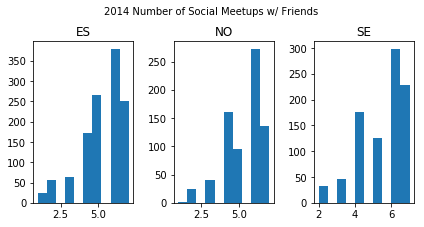

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_meet)
axs[1].hist(NO_meet)
axs[2].hist(SE_meet)

fig.text(0.25, 1, '2014 Number of Social Meetups w/ Friends')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

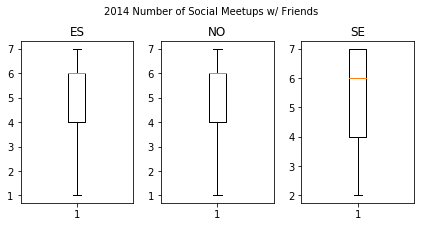

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].boxplot(ES_meet)
axs[1].boxplot(NO_meet)
axs[2].boxplot(SE_meet)

fig.text(0.25, 1, '2014 Number of Social Meetups w/ Friends')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [25]:
F, p = stats.f_oneway(ES_meet, NO_meet, SE_meet)
print('F statistic:', F, '\np-value:', p)

F statistic: 3.726110434690217 
p-value: 0.02420388186106648


In [26]:
print('ES:', ES_meet.mean(), ES_meet.count())
print('NO:', NO_meet.mean(), NO_meet.count())
print('SE:', SE_meet.mean(), SE_meet.count())

print('\n', stats.ttest_ind(ES_meet, NO_meet))
print(stats.ttest_ind(ES_meet, SE_meet))
print(stats.ttest_ind(SE_meet, NO_meet))

ES: 5.2601156069364166 1211
NO: 5.3023255813953485 731
SE: 5.426211453744493 908

 Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
Ttest_indResult(statistic=-2.649547268580078, pvalue=0.00811992279651295)
Ttest_indResult(statistic=1.8305856428076237, pvalue=0.06734412432597783)


**How people met socially.**

Sampled Spain, Norway, and Sweden. The assumption might be that Norway and Sweden would be more similar. 

In the histograms above contain 3-4 bins for each histogram, Spain has the highest mid distribution of all the histograms. And Spain also has the highest count frequence. 

The boxplots are not super meaningful. Only man different is the Sweden boxplot has a larger interquartile range. 

**F statistic: 3.726110434690217**
**p-value: 0.02420388186106648**

ES: 5.2601156069364166 1211
NO: 5.3023255813953485 731
SE: 5.426211453744493 908

ES - Ttest_indResult(statistic=-0.632916395870007, pvalue=0.5268628350318294)
NO - Ttest_indResult(statistic=-2.649547268580078, **pvalue=0.00811992279651295**)
SE - Ttest_indResult(statistic=1.8305856428076237, pvalue=0.06734412432597783)


Counts for Norway
6.0    272
4.0    160
7.0    136
5.0     96
3.0     40
2.0     25
1.0      2

This pvalue for Norway is a result of a sampling effect and how the data is unevenly distributed. The other countries Spain and Sweden have a more evenly distributed data with more samples. Appears as though the Norway data is overfitting. 



## Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [27]:
ES_act = df['sclact'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
NO_act = df['sclact'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()
SE_act = df['sclact'][(df['cntry'] == 'SE') & (df['year'] == 7)].dropna()

In [53]:
ES_act.value_counts()

3.0    514
2.0    331
1.0    164
4.0    147
5.0     29
Name: sclact, dtype: int64

In [54]:
NO_act.value_counts()

3.0    385
2.0    183
4.0    106
1.0     35
5.0     22
Name: sclact, dtype: int64

In [55]:
SE_act.value_counts()

3.0    443
2.0    218
4.0    169
1.0     52
5.0     22
Name: sclact, dtype: int64

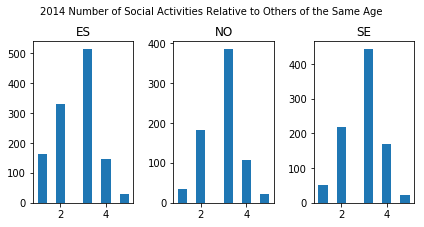

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(6, 3))

axs[0].hist(ES_act)
axs[1].hist(NO_act)
axs[2].hist(SE_act)

fig.text(0.1, 1, '2014 Number of Social Activities Relative to Others of the Same Age')
axs[0].set_title('ES')
axs[1].set_title('NO')
axs[2].set_title('SE')
    
plt.tight_layout()
plt.show()

In [29]:
F, p = stats.f_oneway(ES_act, NO_act, SE_act)
print('F statistic:', F, '\np-value:', p)

F statistic: 27.753885475253163 
p-value: 1.1583945951240228e-12


In [30]:

print('ES:', ES_act.mean(), ES_act.count())
print('NO:', NO_act.mean(), NO_act.count())
print('SE:', SE_act.mean(), SE_act.count())

print('\n', stats.ttest_ind(ES_act, NO_act))
print(stats.ttest_ind(ES_act, SE_act))
print(stats.ttest_ind(SE_act, NO_act))

ES: 2.6168776371308016 1185
NO: 2.859097127222982 731
SE: 2.879424778761062 904

 Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
Ttest_indResult(statistic=0.4823216270234106, pvalue=0.6296421272017451)


**sclact - Take part in social activities compared to others of same age.**

Starting with the histograms, Spain has much higher count values the the other two countries. 

F statistic: 27.753885475253163 
p-value: 1.1583945951240228e-12

A negative t-value has solely to do with the direction of comparison of the two groups. If you subtract the larger percentage from the smaller, you’ll have a negative t-value. That has nothing to do with the absolute value of t or its associated p-value — a small absolute t will have a low p-value in either direction. And, if you just switch the order of subtraction, the t-value would be the same amount positive. https://www.quora.com/How-can-one-interpret-a-negative-t-value-in-a-student-test-p-value-is-very-low

Ttest_indResult(statistic=-5.671149129663532, pvalue=1.6345881270312057e-08)
Ttest_indResult(statistic=-6.500257345866597, pvalue=1.000080729987386e-10)
Ttest_indResult(statistic=0.4823216270234106, pvalue=0.6296421272017451)

